In [1]:
import pandahouse as ph
import pandas as pd
import numpy as np

In [2]:
connection = {'database':'default',
             'host': 'https://clickhouse.lab.karpov.courses',
             'user':'student',
             'password':'dpo_python_2020'}

In [3]:
query="""SELECT count(*)
FROM ldn_listings"""

In [4]:
ph.read_clickhouse(query, connection=connection)

,count()
0,85207


In [5]:
query2="""SELECT
id,
room_type,
replaceRegexpAll(price, '[$,]', '' ) AS price
FROM ldn_listings
LIMIT 1000"""

In [6]:
df=ph.read_clickhouse(query2,connection=connection)

In [7]:
df.price=df.price.astype(float)

In [8]:
df.dtypes

id            uint32
room_type     object
price        float64
dtype: object

In [25]:
df.groupby('room_type')['price'].quantile(q=0.75)

room_type
Entire home/apt    160.00
Hotel room         157.00
Private room        70.00
Shared room         69.25
Name: price, dtype: float64

In [37]:
query3="""SELECT 
room_type,
AVG(toFloat32OrNull(replaceRegexpAll(price, '[$,]', '' ))) AS price,
AVG(toFloat32OrNull(review_scores_rating)) AS score
FROM ldn_listings
GROUP BY room_type
LIMIT 1000
"""

In [38]:
df3=ph.read_clickhouse(query3, connection=connection)

In [39]:
import seaborn as sns

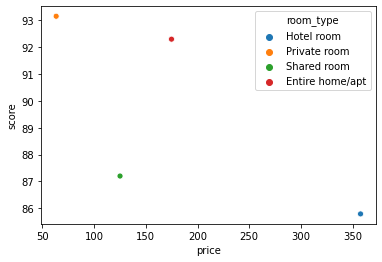

In [40]:
sns.scatterplot(x='price', y='score', data=df3, hue='room_type')

In [47]:
query4="""SELECT 
DISTINCT host_id,
host_verifications
FROM ldn_listings
WHERE experiences_offered != 'none'
"""

In [48]:
df4=ph.read_clickhouse(query4, connection=connection)

In [68]:
df4.host_verifications=df4.host_verifications.apply(lambda x: x.strip('[]').split(','))

In [72]:
df4.explode('host_verifications').host_verifications.value_counts()

 'phone'                    1345
'email'                     1345
 'reviews'                  1309
 'government_id'            1196
 'jumio'                    1115
 'offline_government_id'     469
 'work_email'                279
 'facebook'                  270
 'selfie'                    252
 'identity_manual'           227
 'manual_offline'             70
 'google'                     34
 'kba'                        27
'phone'                       16
 'manual_online'              16
 'sent_id'                     6
Name: host_verifications, dtype: int64

In [78]:
query5="""SELECT 
neighbourhood_cleansed,
experiences_offered,
Count(*) AS experiences_count
FROM ldn_listings
WHERE experiences_offered != 'none'
GROUP BY neighbourhood_cleansed,
experiences_offered
ORDER BY experiences_count DESC
LIMIT 100
"""

In [79]:
df5=ph.read_clickhouse(query5, connection=connection)

In [85]:
df5_1=df5.pivot(index='neighbourhood_cleansed', columns='experiences_offered', values='experiences_count')

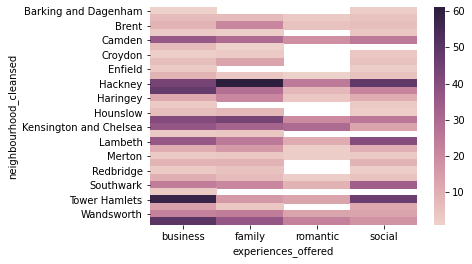

In [88]:
sns.heatmap(df5_1, cmap=sns.cubehelix_palette(as_cmap=True))